In [2]:
%config Completer.use_jedi = False

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot

In [4]:
df = pd.read_csv("data/british airways.csv")

In [5]:
df.tail()

,Date,Adjusted Passenger Count
124,2015-11-01,19800
125,2015-12-01,17560
126,2016-01-01,18397
127,2016-02-01,16230
128,2016-03-01,18392


(array([ 1.,  7.,  5., 11., 19., 16., 18., 38., 10.,  4.]),
 array([10520. , 11722.4, 12924.8, 14127.2, 15329.6, 16532. , 17734.4,
        18936.8, 20139.2, 21341.6, 22544. ]),
 <a list of 10 Patch objects>)

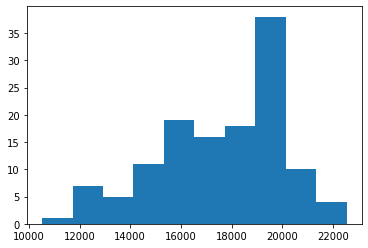

In [6]:
plt.hist(df["Adjusted Passenger Count"])

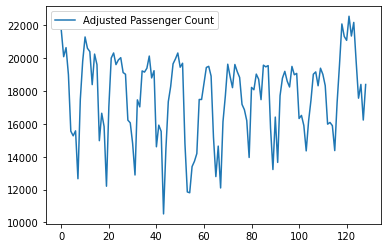

In [7]:
df.plot()

In [7]:
train_df = pd.DataFrame()
train_df['ds'] = df.Date
train_df['y'] = df['Adjusted Passenger Count']
train_df.head()

,ds,y
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554


In [8]:
prophet = Prophet()

In [9]:
prophet.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
prediction_df = prophet.make_future_dataframe(periods=14, freq='M')

In [11]:
forecast = prophet.predict(prediction_df)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-01,18587.043191,18835.091825,21349.142975,18587.043191,18587.043191,1525.927661,1525.927661,1525.927661,1525.927661,1525.927661,1525.927661,0.0,0.0,0.0,20112.970852
1,2005-08-01,18554.391994,19409.402888,21962.931142,18554.391994,18554.391994,2104.437946,2104.437946,2104.437946,2104.437946,2104.437946,2104.437946,0.0,0.0,0.0,20658.829940
2,2005-09-01,18521.740796,19069.682588,21686.315086,18521.740796,18521.740796,1844.653477,1844.653477,1844.653477,1844.653477,1844.653477,1844.653477,0.0,0.0,0.0,20366.394273
3,2005-10-01,18490.142863,18865.219634,21401.464779,18490.142863,18490.142863,1666.340339,1666.340339,1666.340339,1666.340339,1666.340339,1666.340339,0.0,0.0,0.0,20156.483202
4,2005-11-01,18457.491666,15218.288215,17762.498649,18457.491666,18457.491666,-1989.011596,-1989.011596,-1989.011596,-1989.011596,-1989.011596,-1989.011596,0.0,0.0,0.0,16468.480070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2016-12-31,20158.595651,16350.938461,18859.761118,20114.877849,20198.502241,-2557.687067,-2557.687067,-2557.687067,-2557.687067,-2557.687067,-2557.687067,0.0,0.0,0.0,17600.908583
139,2017-01-31,20215.278553,14752.909826,17378.575092,20165.014080,20261.569738,-4169.722847,-4169.722847,-4169.722847,-4169.722847,-4169.722847,-4169.722847,0.0,0.0,0.0,16045.555706
140,2017-02-28,20266.476013,16035.751780,18568.844552,20209.472640,20318.392390,-3011.482800,-3011.482800,-3011.482800,-3011.482800,-3011.482800,-3011.482800,0.0,0.0,0.0,17254.993213
141,2017-03-31,20323.158916,19615.016816,22217.914594,20255.900426,20383.258583,550.714570,550.714570,550.714570,550.714570,550.714570,550.714570,0.0,0.0,0.0,20873.873485


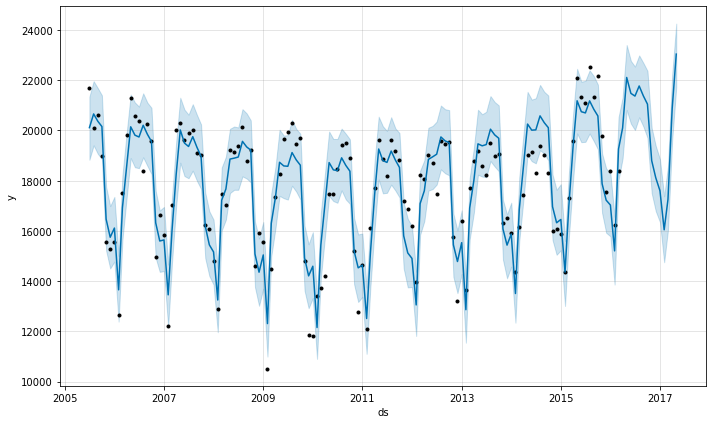

In [13]:
fig1 = prophet.plot(forecast)

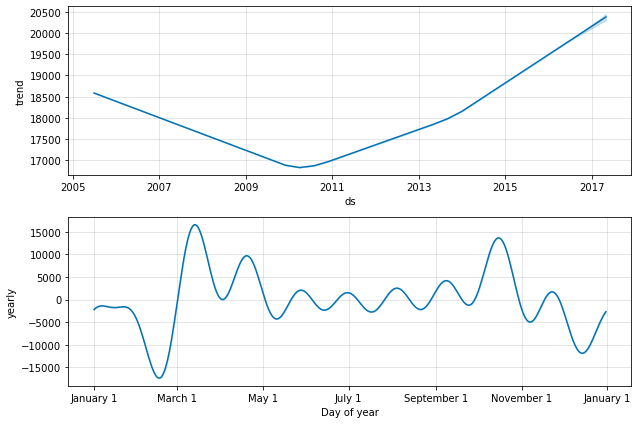

In [14]:
fig2 = prophet.plot_components(forecast)

In [17]:
enabled = False
if enabled:
    plot_plotly(prophet, forecast)

In [19]:
se = np.square(forecast.loc[:, 'yhat'] - train_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [20]:
rmse

990.5226335824592

In [21]:
prophet.make_future_dataframe()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-07-01,18587.043191,18812.642746,21478.572941,18587.043191,18587.043191,1525.927661,1525.927661,1525.927661,1525.927661,1525.927661,1525.927661,0.0,0.0,0.0,20112.970852
1,2005-08-01,18554.391994,19353.154245,21876.892365,18554.391994,18554.391994,2104.437946,2104.437946,2104.437946,2104.437946,2104.437946,2104.437946,0.0,0.0,0.0,20658.829940
2,2005-09-01,18521.740796,19073.354810,21586.930320,18521.740796,18521.740796,1844.653477,1844.653477,1844.653477,1844.653477,1844.653477,1844.653477,0.0,0.0,0.0,20366.394273
3,2005-10-01,18490.142863,18829.473956,21499.889433,18490.142863,18490.142863,1666.340339,1666.340339,1666.340339,1666.340339,1666.340339,1666.340339,0.0,0.0,0.0,20156.483202
4,2005-11-01,18457.491666,15098.521507,17728.887873,18457.491666,18457.491666,-1989.011596,-1989.011596,-1989.011596,-1989.011596,-1989.011596,-1989.011596,0.0,0.0,0.0,16468.480070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2015-11-01,19379.662864,16668.624721,19295.258103,19379.662864,19379.662864,-1500.473672,-1500.473672,-1500.473672,-1500.473672,-1500.473672,-1500.473672,0.0,0.0,0.0,17879.189192
125,2015-12-01,19434.517286,15923.384493,18455.335568,19434.517286,19434.517286,-2210.619407,-2210.619407,-2210.619407,-2210.619407,-2210.619407,-2210.619407,0.0,0.0,0.0,17223.897879
126,2016-01-01,19491.200188,15804.039124,18308.540549,19491.200188,19491.200188,-2460.088543,-2460.088543,-2460.088543,-2460.088543,-2460.088543,-2460.088543,0.0,0.0,0.0,17031.111645
127,2016-02-01,19547.883091,13913.229310,16426.257917,19547.883091,19547.883091,-4342.325587,-4342.325587,-4342.325587,-4342.325587,-4342.325587,-4342.325587,0.0,0.0,0.0,15205.557503


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


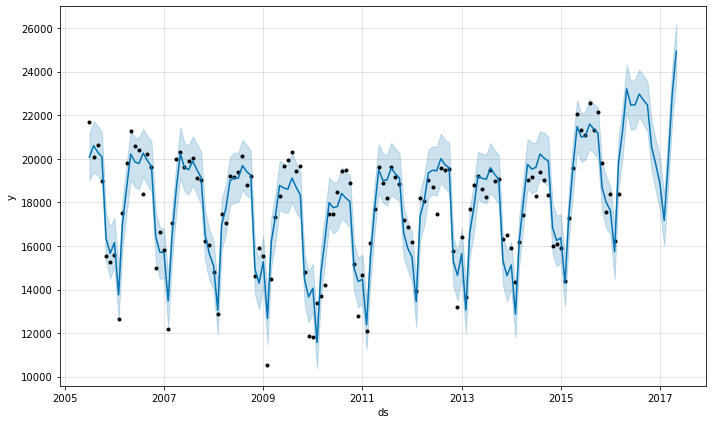

In [48]:
m = Prophet(changepoint_prior_scale=0.99)
forecast = m.fit(train_df).predict(m.make_future_dataframe(periods=14, freq='M'))
fig = m.plot(forecast)

In [49]:
se = np.square(forecast.loc[:, 'yhat'] - train_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse

887.5584193771867

In [39]:
rmse

887.071680569612

In [9]:
train_df = pd.DataFrame()
train_df['ds'] = df.Date
train_df['y'] = df['Adjusted Passenger Count']
train_df.head()

,ds,y
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554


In [10]:
prophet = Prophet()
prophet.fit(train_df)
prediction_df = prophet.make_future_dataframe(periods=14, freq='M')
forecast = prophet.predict(prediction_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


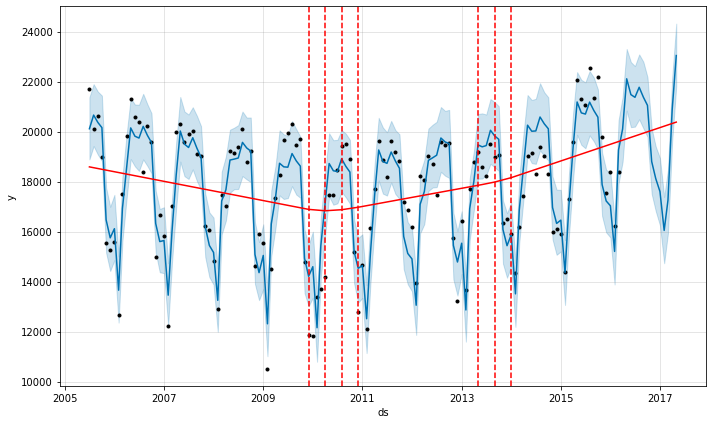

In [16]:
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

In [18]:
prophet_cp = Prophet(n_changepoints=7)
prediction_df = prophet.make_future_dataframe(periods=14, freq='M')
forecast = prophet_cp.fit(train_df).predict(prediction_df)
se = np.square(forecast.loc[:, 'yhat'] - train_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(f"rmse={rmse}")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=991.1512237245437


In [19]:
prophet_cp = Prophet(n_changepoints=16)
prediction_df = prophet.make_future_dataframe(periods=14, freq='M')
forecast = prophet_cp.fit(train_df).predict(prediction_df)
se = np.square(forecast.loc[:, 'yhat'] - train_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(f"rmse={rmse}")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=992.7690901280231


In [31]:
for i in range(21):
    mut = i * .01
    m = Prophet(changepoint_prior_scale=(0.4 + mut))
    forecast = m.fit(train_df).predict(m.make_future_dataframe(periods=14, freq='M'))
    #fig = m.plot(forecast)
    se = np.square(forecast.loc[:, 'yhat'] - train_df['y'])
    mse = np.mean(se)
    rmse = np.sqrt(mse)
    print(f"rmse={rmse}")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=910.9308057296582


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=909.2734916773886


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=908.8280263945014


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=909.0340051561649


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=908.3817487680114


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=907.7102997210403


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=906.8331786783194


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=906.9082682332185


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=906.4278660775642


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=905.8228015530217


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=905.9397653456003


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=902.8202908749718


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=903.3812180642109


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=902.9425019982588


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=901.8057359825749


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=902.3277304013698


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=900.9748698329082


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=900.6298623743385


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=899.8437582221378


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


rmse=900.3968364243912
rmse=898.837118932623


In [51]:
train_df.y[-1:]

128    18392
Name: y, dtype: int64

In [52]:
train_df.y

0      21686
1      20084
2      20635
3      18988
4      15554
       ...  
124    19800
125    17560
126    18397
127    16230
128    18392
Name: y, Length: 129, dtype: int64